Total samples before padding: 10
Classes: ['aku', 'hai']
Max frames found: 30
✅ X shape after padding: (10, 30, 225)
✅ y shape: (10,)
Train size: 8, Test size: 2
✅ Model berhasil dimuat
1/1 [==============================] - 0s 427ms/step - loss: 0.6354 - accuracy: 0.5000

Test Loss: 0.6354
Test Accuracy: 0.5000
1/1 [==============================] - 0s 249ms/step

Classification Report:
              precision    recall  f1-score   support

         aku       0.00      0.00      0.00         1
         hai       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/opt/anaconda3/envs/slenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/slenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/slenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.sh

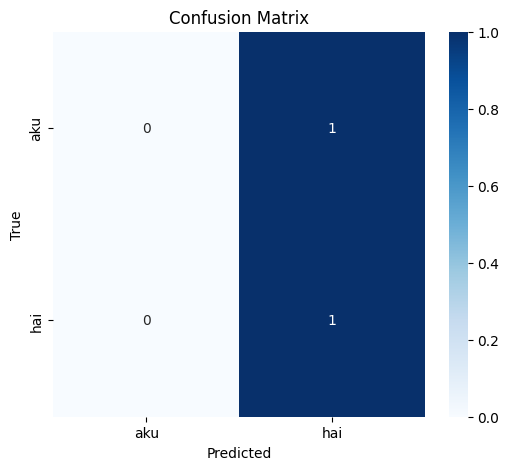

1/1 [==============================] - 0s 135ms/step

🔍 Sample Test:
True Label: hai
Predicted Label: hai


In [ ]:
# ==========================================
# 4_evaluate_model.ipynb
# Evaluasi model pengenalan bahasa isyarat
# ==========================================

import numpy as np # type: ignore
import tensorflow as tf # type: ignore
import os
import matplotlib.pyplot as plt # type: ignore
from sklearn.metrics import confusion_matrix, classification_report # type: ignore
import seaborn as sns # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore

# 1️⃣ Load dataset processed
data_dir = "../../dataset/processed_words"
classes = sorted(os.listdir(data_dir))

X, y = [], []

for label_idx, label_name in enumerate(classes):
    class_dir = os.path.join(data_dir, label_name)
    for file in os.listdir(class_dir):
        if file.endswith(".npy"):
            path = os.path.join(class_dir, file)
            features = np.load(path, allow_pickle=True)
            X.append(features)
            y.append(label_idx)

print(f"Total samples before padding: {len(X)}")
print(f"Classes: {classes}")

# 2️⃣ Samakan panjang (padding)
# Cari panjang frame maksimum dari semua video
max_len = 30
print(f"Max frames found: {max_len}")

def pad_sequence(seq, max_len=max_len):
    seq = np.array(seq)
    if len(seq) < max_len:
        pad_width = ((0, max_len - len(seq)), (0, 0))
        return np.pad(seq, pad_width=pad_width, mode='constant')
    else:
        return seq[:max_len]

X = np.array([pad_sequence(x) for x in X])
y = np.array(y)

print(f"✅ X shape after padding: {X.shape}")
print(f"✅ y shape: {y.shape}")

X = X.astype('float32')
X = X / (np.max(X) + 1e-8)
y_cat = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y
)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model_path = "../../models/sign_word_model.keras"
if os.path.exists(model_path):
    model = tf.keras.models.load_model(model_path)
    print("✅ Model berhasil dimuat")
else:
    raise FileNotFoundError("❌ Model belum ditemukan di folder '../models/'")

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=classes))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

idx = np.random.randint(0, len(X_test))
sample = X_test[idx:idx+1]
true_label = classes[np.argmax(y_test[idx])]
pred_label = classes[np.argmax(model.predict(sample))]

print(f"\n🔍 Sample Test:")
print(f"True Label: {true_label}")
print(f"Predicted Label: {pred_label}")
